# Cats versus Dogs

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.io.wavfile as sci_wav # Open wav files
import os  # Manipulate files
import matplotlib.pyplot as plt # Plotting

In [2]:
# biblioteca que trabalha com áudio
#! pip install librosa

In [3]:
import librosa
%matplotlib inline

## Modelo com Extração de Características

In [13]:
import csv
sound_types = 'cat dog'.split()

# Extrai caracteristicas e gera csv
header = 'filename chroma_stft std_chroma spectral_centroid std_centroid'
for i in range(1, 21):
    header += f' mfcc{i} std_mfcc{i}'
header += ' label'
header = header.split()

file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for g in sound_types:
    for filename in os.listdir(f'./audio-cats-and-dogs/cats_dogs/{g}'):
        songname = f'./audio-cats-and-dogs/cats_dogs/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=2, sr=None)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        #spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        #rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        #zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename[:-4].replace(" ", "").replace("-","")} {np.mean(chroma_stft)} {np.std(chroma_stft)} {np.mean(spec_cent)} {np.std(spec_cent)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)} {np.std(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

/home/jailson/anaconda3/lib/python3.7/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [14]:
df_data = pd.read_csv('data.csv')
df_data.head()

,filename,chroma_stft,std_chroma,spectral_centroid,std_centroid,mfcc1,std_mfcc1,mfcc2,std_mfcc2,mfcc3,...,std_mfcc16,mfcc17,std_mfcc17,mfcc18,std_mfcc18,mfcc19,std_mfcc19,mfcc20,std_mfcc20,label
0,cat_82,0.355994,0.301829,1471.774296,141.946504,-92.005760,17.995726,114.254723,12.456283,-49.434143,...,8.900279,-3.011898,9.673502,4.370627,7.728966,0.415489,6.438667,-3.102325,7.365862,cat
1,cat_71,0.402802,0.363965,2363.655663,950.269718,-214.196747,99.733192,39.795223,51.403950,-0.209272,...,11.547688,17.532125,20.919514,2.958978,15.568254,-8.528633,22.951956,11.560122,16.130194,cat
2,cat_127,0.423669,0.322513,2985.732037,569.319293,-346.770447,140.097763,-16.608671,61.170074,-20.000067,...,13.063638,6.280953,10.606990,-2.667626,9.015184,-6.755027,12.007116,-1.486891,20.316124,cat
3,cat_62,0.492205,0.333800,2106.219313,404.808504,-300.945923,89.039764,64.659584,28.309046,-10.304729,...,14.069996,2.005222,7.277654,-3.586581,11.165674,-3.887171,12.477126,-0.948295,20.020546,cat
4,cat_33,0.497484,0.268727,1811.734514,426.986944,-171.568726,112.431190,94.461678,35.394558,-37.704765,...,5.943502,1.706733,4.408141,1.559379,6.250378,-1.413296,5.796556,0.258866,7.445204,cat


## Target Distribution

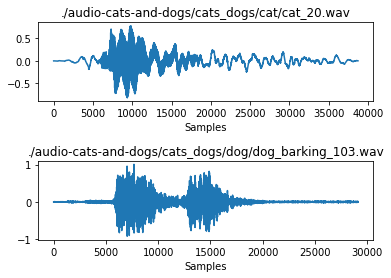

In [18]:
# Target Distribution

#cat_df = df_data[df_data.label == 'cat']
#dog_df = df_data[df_data.label == 'dog']

#num_cat = len(cat_df)
#num_dog = len(dog_df)


#nums = (num_cats, num_dogs)

cat_path = './audio-cats-and-dogs/cats_dogs/cat/cat_20.wav'
dog_path = './audio-cats-and-dogs/cats_dogs/dog/dog_barking_103.wav'
inspect_cat = np.array(librosa.load(cat_path)[0])
inspect_dog = np.array(librosa.load(dog_path)[0])
fig, (ax_cat_5, ax_dog_5) = plt.subplots(2, 1) # subplot for section 5
ax_cat_5.plot(inspect_cat)
ax_cat_5.set_title(cat_path)
ax_cat_5.set_xlabel("Samples")
ax_dog_5.plot(inspect_dog)
ax_dog_5.set_title(dog_path)
ax_dog_5.set_xlabel("Samples")
plt.subplots_adjust(hspace = 0.75)
plt.show()

## Classificador 

In [17]:
data = df_data.drop(['filename'], axis=1)

In [20]:
data.head()

,chroma_stft,std_chroma,spectral_centroid,std_centroid,mfcc1,std_mfcc1,mfcc2,std_mfcc2,mfcc3,std_mfcc3,...,std_mfcc16,mfcc17,std_mfcc17,mfcc18,std_mfcc18,mfcc19,std_mfcc19,mfcc20,std_mfcc20,label
0,0.355994,0.301829,1471.774296,141.946504,-92.005760,17.995726,114.254723,12.456283,-49.434143,12.759011,...,8.900279,-3.011898,9.673502,4.370627,7.728966,0.415489,6.438667,-3.102325,7.365862,cat
1,0.402802,0.363965,2363.655663,950.269718,-214.196747,99.733192,39.795223,51.403950,-0.209272,18.265841,...,11.547688,17.532125,20.919514,2.958978,15.568254,-8.528633,22.951956,11.560122,16.130194,cat
2,0.423669,0.322513,2985.732037,569.319293,-346.770447,140.097763,-16.608671,61.170074,-20.000067,26.436598,...,13.063638,6.280953,10.606990,-2.667626,9.015184,-6.755027,12.007116,-1.486891,20.316124,cat
3,0.492205,0.333800,2106.219313,404.808504,-300.945923,89.039764,64.659584,28.309046,-10.304729,17.828884,...,14.069996,2.005222,7.277654,-3.586581,11.165674,-3.887171,12.477126,-0.948295,20.020546,cat
4,0.497484,0.268727,1811.734514,426.986944,-171.568726,112.431190,94.461678,35.394558,-37.704765,33.028461,...,5.943502,1.706733,4.408141,1.559379,6.250378,-1.413296,5.796556,0.258866,7.445204,cat


In [22]:
#Ajusta categorias
from sklearn.preprocessing import LabelEncoder, StandardScaler

sound_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(sound_list)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
X

array([[-0.12801697, -0.01628791, -0.12477257, ..., -0.65979193,
        -0.55549801, -0.53279608],
       [ 0.19889225,  1.93800829,  1.45096913, ...,  2.21559963,
         1.34620487,  0.91413309],
       [ 0.3446319 ,  0.63427149,  2.55002973, ...,  0.30981944,
        -0.34597807,  1.60520057],
       ...,
       [-0.29051568,  0.14545163, -0.7565227 , ...,  0.91898697,
         0.47782565, -0.16829481],
       [-0.11766414, -0.10834908, -0.80034465, ..., -0.44918151,
        -0.34330724, -0.85239943],
       [-1.21430267,  0.51462711, -0.71477639, ...,  1.45539392,
        -1.80970232,  1.54653125]])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [25]:
## Classificador binário
from sklearn.linear_model import SGDClassifier

y_train_cat = (y_train == 0)
y_test_cat = (y_test == 0)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_cat)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### Treinamento Classificador Binário

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=5, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_cat):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_cat[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_cat[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.8648648648648649
0.8378378378378378
0.8378378378378378
0.8648648648648649
0.7567567567567568


/home/jailson/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### Validação

In [30]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

cross_val_score(sgd_clf, X_train, y_train_cat, cv=5, scoring='accuracy')

array([0.86486486, 0.83783784, 0.83783784, 0.86486486, 0.75675676])

In [31]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_cat, cv=5)

In [32]:
# Matriz de confusão
confusion_matrix(y_train_cat, y_train_pred)

array([[59, 15],
       [16, 95]])

In [4]:
def preproc_from_dir(dataset_path):
    # Sampling rate do audio
    sr = 16000
    # Duracao a ser lida
    #duration = 2
    duration=11
    # Numero de mel bins
    n_mels = 64

    audios = []
    Y = []

    # An ID will be affected to each sub-folders by alphabetical order
    imagepaths = list()
    label = 0
    classes = sorted(os.walk(dataset_path).__next__()[1])
    # List each sub-directory (the classes)
    for c in classes:
        c_dir = os.path.join(dataset_path, c)
        walk = os.walk(c_dir).__next__()
        # Add each audio to the training set
        for sample in walk[2]:
            # Only keeps wav
            if sample.endswith('.wav'):
                c_file = os.path.join(c_dir, sample)
                x, sr = librosa.load(c_file, mono=True, duration=duration, sr=sr)
                x = librosa.util.normalize(x)
                #D = librosa.stft(x, n_fft=int(0.040*sr), hop_length=int(0.020*sr), window='hann')
                #S = librosa.feature.melspectrogram(S=np.abs(D),sr=sr, n_mels=n_mels)
                #chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
                #spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
                #spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
                #rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
                #zcr = librosa.feature.zero_crossing_rate(x)
                mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=n_mels)
                #to_append = f'{np.mean(chroma_stft)} {np.std(chroma_stft)} {np.mean(spec_cent)} {np.std(spec_cent)} {np.mean(spec_bw)} {np.std(spec_bw)} {np.mean(rolloff)} {np.std(rolloff)} {np.mean(zcr)} {np.std(zcr)}'    
                to_append = ''
                for e in mfcc:
                    to_append += f' {np.mean(e)} {np.std(e)}'
                S = np.fromstring(to_append, dtype=float, sep=" ")
                #audios.append(S[:,np.newaxis])
                audios.append(S)
                Y.append(label)
        label += 1

    X = np.array(audios)
    Y = np.array(Y)
    num_classes = len(classes)

    return X,Y,classes